In [21]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.constants import e as eV, hbar, hbar as ℏ, c
ň = np.newaxis
import cmath
from math import sqrt, pi
s3 = sqrt(3)
hexh = 576e-9
Klen = 4*pi/3/s3/hexh
irrepnames=[ "A1'", "A2'", "E'", "A1''", "A2''","E''",]
irrepnames_latex = {"E'": "$E'$", "A1'": "$A_1'$", "A2'" : "$A_2'$", "E''":"$E''$", "A1''":"$A_1''$", "A2''" : "$A_2''$"}

In [52]:
fileE="/m/phys/project/qd/Marek/dispdata/lMax3ScuffE-inplanesupdisps_broader_400k_dispdata.npz"
fileM="/m/phys/project/qd/Marek/dispdata/lMax3ScuffM-inplanesupdisps_broader_400k_dispdata.npz"
filecross="/m/phys/project/qd/Marek/dispdata/lMax3Scuffsupdisps_broader_400k_crosscut.npz"
freqlims = (1.38*eV/hbar, 1.50*eV/hbar)

In [56]:
dataE = np.load(fileE)
dataM = np.load(fileM)
dataS = np.load(filecross)
fboti = np.searchsorted( dataE['freqs'][:,0], freqlims[0],  side='left')
ftopi = np.searchsorted( dataE['freqs'][:,0], freqlims[1], side='right')
kboti = 60
ktopi = -61

In [57]:
ksE = dataE['ks'][fboti:ftopi,kboti:ktopi]
svE = dataE['leastSVs'][fboti:ftopi,kboti:ktopi]
freqE = dataE['freqs'][fboti:ftopi,kboti:ktopi]
ksM = dataM['ks'][fboti:ftopi,kboti:ktopi]
svM = dataM['leastSVs'][fboti:ftopi,kboti:ktopi]
freqM = dataM['freqs'][fboti:ftopi,kboti:ktopi]
freqS = dataS['freqs']

1.441157857035075 A1'
1.4410789262435517 A2'
1.4379651065179424 E'
1.4410789262435517 A1''
1.426476729811671 A2''
1.436710106932716 E''


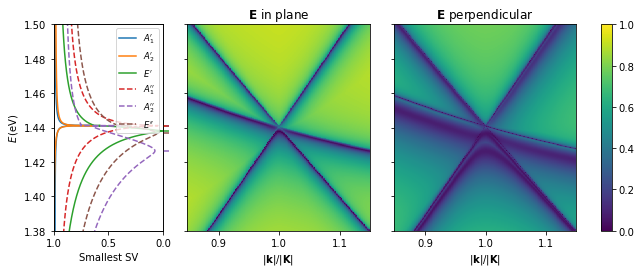

In [78]:
plotreps = irrepnames

irrep_ls = {"E'": '-', "A1'": "-", "A2'" : "-", "E''":"--", "A1''":"--", "A2''" : "--"}

f, (axS, axE, axM, cax) = plt.subplots(1,4,figsize=(10,3.8), gridspec_kw = {'width_ratios':[3,5,5, 0.3]})
axE.pcolormesh(ksE[:,:]/Klen, freqE[:,:]*hbar/eV, svE[:,:,], vmin=0, vmax=1, rasterized=True)
#axE.imshow(svE[:,:,], vmin=0, vmax=1, extent=[ksE[0,0], ksE[0,-1],freqE[0,0], freqE[-1,0]])
im = axM.pcolormesh(ksM[:,:]/Klen, freqM[:,:]*hbar/eV, svM[:,:,], vmin=0, vmax=1, rasterized=True)
f.colorbar(im, cax=cax)
axE.set_xlabel('$\\left|\\mathbf{k}\\right|/\\left|\\mathbf{K}\\right|$')
axM.set_xlabel('$\\left|\\mathbf{k}\\right|/\\left|\\mathbf{K}\\right|$')
axE.set_title('$\\mathbf{E}$ in plane')
axM.set_title('$\\mathbf{E}$ perpendicular')

axE.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
axM.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
axS.set_xlabel("Smallest SV")
axS.set_ylabel("$E\,(\mathrm{eV})$")
repcolors = {}
reppeakfreqs = {}
for rep in plotreps:
    p = axS.plot(dataS[rep], freqS*hbar/eV, label=irrepnames_latex[rep], ls=irrep_ls[rep])
    reppeakfreqs[rep] = freqS[np.argmin(dataS[rep])]
    print(freqS[np.argmin(dataS[rep])]/eV*hbar, rep)
    repcolors[rep] = p[-1].get_color()
axS.set_ylim(freqlims[0]/eV*hbar,freqlims[1]/eV*hbar)
axE.set_ylim(freqlims[0]/eV*hbar,freqlims[1]/eV*hbar)
axM.set_ylim(freqlims[0]/eV*hbar,freqlims[1]/eV*hbar)
axS.set_xlim(1,0)
axS.legend(prop={'size': 8.5})

ax2 = axS.twinx()
ax2.set_ylim(freqlims[0]/eV*hbar,freqlims[1]/eV*hbar)
ax2.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
ax2.set_yticks([reppeakfreqs[rep]/eV*hbar for rep in irrepnames])
ax2.yaxis.set_tick_params(size=6, width=1.5)
for  i, tick in enumerate(ax2.get_yticklines()):
    tick.set_color(repcolors[plotreps[i//2]]) # For some reason, there are 2*len(plotreps) Line2D objects.
    #tick.set_linestyle(repls[plotreps[i//2]]) # For some reason, there are 2*len(plotreps) Line2D objects. # dose not werk
    if (plotreps[i//2] == "A2'"): # hack the A1' tick visibility here
        tick.set_markersize(3)
#f.suptitle("Cylindrical nanoparticle, h")
plt.savefig("../../../hexlaser/supfigs/dispersion_cylindrical.pdf", dpi=600)

In [71]:
svE.shape

(608, 279)

In [94]:
fileE="/m/phys/project/qd/Marek/dispdata/lMax3MieInterp40nmE-inplanesupdisps_broader_400k_dispdata.npz"
fileM="/m/phys/project/qd/Marek/dispdata/lMax3MieInterp40nmM-inplanesupdisps_broader_400k_dispdata.npz"
filecross="/m/phys/project/qd/Marek/dispdata/lMax3MieInterp40nmsupdisps_broader_400k_crosscut.npz"
freqlims = (1.38*eV/hbar, 1.50*eV/hbar)

In [95]:
dataE = np.load(fileE)
dataM = np.load(fileM)
dataS = np.load(filecross)
fboti = np.searchsorted( dataE['freqs'][:,0], freqlims[0],  side='left')
ftopi = np.searchsorted( dataE['freqs'][:,0], freqlims[1], side='right')
kboti = 60
ktopi = -61

In [96]:
ksE = dataE['ks'][fboti:ftopi,kboti:ktopi]
svE = dataE['leastSVs'][fboti:ftopi,kboti:ktopi]
freqE = dataE['freqs'][fboti:ftopi,kboti:ktopi]
ksM = dataM['ks'][fboti:ftopi,kboti:ktopi]
svM = dataM['leastSVs'][fboti:ftopi,kboti:ktopi]
freqM = dataM['freqs'][fboti:ftopi,kboti:ktopi]
freqS = dataS['freqs']

1.4410789262435517 A1'
1.4401514894431482 A2'
1.4408421338689805 E'
1.441157857035075 A1''
1.4410789262435517 A2''
1.4401435963639957 E''


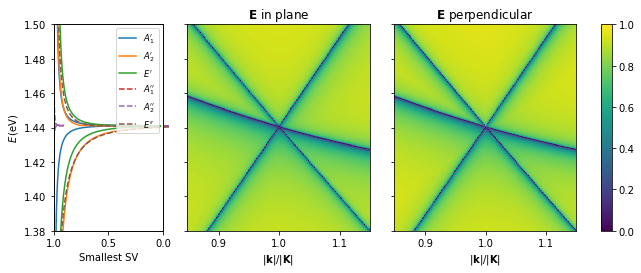

In [100]:
plotreps = irrepnames

irrep_ls = {"E'": '-', "A1'": "-", "A2'" : "-", "E''":"--", "A1''":"--", "A2''" : "--"}

f, (axS, axE, axM, cax) = plt.subplots(1,4,figsize=(10,3.8), gridspec_kw = {'width_ratios':[3,5,5, 0.3]})
axE.pcolormesh(ksE[:,:]/Klen, freqE[:,:]*hbar/eV, svE[:,:,], vmin=0, vmax=1, rasterized=True)
#axE.imshow(svE[:,:,], vmin=0, vmax=1, extent=[ksE[0,0], ksE[0,-1],freqE[0,0], freqE[-1,0]])
im = axM.pcolormesh(ksM[:,:]/Klen, freqM[:,:]*hbar/eV, svM[:,:,], vmin=0, vmax=1, rasterized=True)
f.colorbar(im, cax=cax)
axE.set_xlabel('$\\left|\\mathbf{k}\\right|/\\left|\\mathbf{K}\\right|$')
axM.set_xlabel('$\\left|\\mathbf{k}\\right|/\\left|\\mathbf{K}\\right|$')
axE.set_title('$\\mathbf{E}$ in plane')
axM.set_title('$\\mathbf{E}$ perpendicular')

axE.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
axM.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
axS.set_xlabel("Smallest SV")
axS.set_ylabel("$E\,(\mathrm{eV})$")
repcolors = {}
reppeakfreqs = {}
for rep in plotreps:
    p = axS.plot(dataS[rep], freqS*hbar/eV, label=irrepnames_latex[rep], ls=irrep_ls[rep])
    reppeakfreqs[rep] = freqS[np.argmin(dataS[rep])]
    print(freqS[np.argmin(dataS[rep])]/eV*hbar, rep)
    repcolors[rep] = p[-1].get_color()
axS.set_ylim(freqlims[0]/eV*hbar,freqlims[1]/eV*hbar)
axE.set_ylim(freqlims[0]/eV*hbar,freqlims[1]/eV*hbar)
axM.set_ylim(freqlims[0]/eV*hbar,freqlims[1]/eV*hbar)
axS.set_xlim(1,0)
axS.legend(prop={'size': 8.5})

ax2 = axS.twinx()
ax2.set_ylim(freqlims[0]/eV*hbar,freqlims[1]/eV*hbar)
ax2.yaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
ax2.set_yticks([reppeakfreqs[rep]/eV*hbar for rep in irrepnames])
ax2.yaxis.set_tick_params(size=6, width=1.5)
for  i, tick in enumerate(ax2.get_yticklines()):
    tick.set_color(repcolors[plotreps[i//2]]) # For some reason, there are 2*len(plotreps) Line2D objects.
    #tick.set_linestyle(repls[plotreps[i//2]]) # For some reason, there are 2*len(plotreps) Line2D objects. # dose not werk
    if (plotreps[i//2] == "A2'"): # hack the A1' tick visibility here
        tick.set_markersize(3)
#f.suptitle("Cylindrical nanoparticle, h")
plt.savefig("../../../hexlaser/supfigs/dispersion_spherical.pdf", dpi=600)